# Medical Appointments No-Show Case Study:<br>Appointments Data Analysis 



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data wrangling</a></li>
<li><a href="#eda">Exploratory data analysis</a></li>
<li><a href="#uni">Univariate exploration</a></li>
<li><a href="#re">Rescheduling phenomenon investigation</a></li>
<li><a href="#time">Timestamp analysis</a></li>
<li><a href="#bi">Bivariate exploration</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

### In this report we will investigate 110,527 medical appointments & its 14 associated variables.

The following is the data description that is found on [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments).<br />
<br />
- PatientId: Identification of a patient.
- AppointmentID: Identification of each appointment.
- Gender: Male or Female.
- Schedule day : the day the patient set up an appointment day.
- Appointment day: the day the patient was expected to show up.
- Age: How old is the patient.
- Neighbourhood: Where the appointment takes place.
- Scholarship: True of False.
- Hipertension: True or False.
- Diabetes: True or False.
- Alcoholism: True or False.
- Handcap: True or False.
- SMS_received: 1 or 0.
- No-show: 1 or 0.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

<a id='wrangling'></a>
# Data Wrangling


In [5]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
65588,5.317250e+14,5607053,F,2016-04-20T11:01:47Z,2016-05-02T00:00:00Z,1,SÃO CRISTÓVÃO,0,0,0,0,0,1,Yes
81903,9.259660e+14,5596877,F,2016-04-18T15:28:38Z,2016-05-30T00:00:00Z,45,ITARARÉ,0,0,0,1,0,1,No
80181,1.897260e+12,5702473,M,2016-05-16T12:25:16Z,2016-05-18T00:00:00Z,62,JARDIM CAMBURI,0,0,0,0,0,0,No
9513,7.319190e+13,5514078,F,2016-03-28T10:40:40Z,2016-05-02T00:00:00Z,19,ROMÃO,0,0,0,0,0,1,No
91071,7.367380e+14,5698883,M,2016-05-16T07:57:46Z,2016-06-08T00:00:00Z,57,DO CABRAL,0,0,0,0,0,0,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


So we have around 110,527 entries , none of them has null values which is good.<br />
However, is there any duplicates or unqiues among `patientID` and `AppointmentID`? possibaly we can use one of them as an index to our data set?<br />
<br />
For the sake of convenience , i'll lower the cases for all column names and use underscores to seperate between two words. 

In [7]:
df.rename(str.lower, axis='columns' ,inplace=True)
df.rename({'no-show':'no_show'}, axis='columns' ,inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
print('patient id duplicates:',df.patientid.duplicated().sum())
print('appointment id duplicates:',df.appointmentid.duplicated().sum())

patient id duplicates: 48783
appointment id duplicates: 0


Looks like `AppointmentID` has no duplicates so we can use it as an index.<br />
`PatientID` duplicating make sense , it means that the same patient had several appointments.

In [9]:
df.set_index('appointmentid' , inplace=True)
df.sample(1)

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
appointmentid,,,,,,,,,,,,,
5663412,7.652490e+14,F,2016-05-05T09:59:31Z,2016-05-06T00:00:00Z,2,FORTE SÃO JOÃO,0,0,0,0,0,0,No


In [10]:
print('Number of Patients with unique ID:',len(df.patientid.unique()))
print('Number of Appointments:',df.patientid.value_counts().sum())

Number of Patients with unique ID: 61744
Number of Appointments: 110527


## Data Cleaning

Do  duplicate entries exist among our data set?

In [11]:
print('Number of entries before removing dulicates:',df.shape[0])
print('Duplicated entries:',df.duplicated().sum())
df.drop_duplicates(inplace=True)
print('Number of entries after removing dulicates:',df.shape[0])

Number of entries before removing dulicates: 110527
Duplicated entries: 618
Number of entries after removing dulicates: 109909


Now lets check the unique values for each column to verify **data integrity**.

In [12]:
for column in df.columns.drop(['patientid','scheduledday','appointmentday','neighbourhood']):
    print(f'{column}:{df[column].unique()}\n')
print(f'Value Counts:{df[df.age==-1].age.value_counts()}')    

gender:['F' 'M']

age:[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]

scholarship:[0 1]

hipertension:[1 0]

diabetes:[0 1]

alcoholism:[0 1]

handcap:[0 1 2 3 4]

sms_received:[0 1]

no_show:['No' 'Yes']

Value Counts:-1    1
Name: age, dtype: int64


### I noticed multiple issues with columns' unique values and they are:
- There is one unique value in `age` which is `-1` , that doesnt make any sense.<br />
- Why does `handcap` column has unique values from `0` to `4`? , my first intial thought was it would be a binary stating if patient is handicaped or not as in 1 and 0.
- `sms_recieved` column has `0` and `1` values only indicating that its binary , however on the data description, it states that it can varry from `0` to `5` indicating number of `sms_recieved` , was it swapped out with `handcap` column?

- My intial thought that `-1` might had been a misentry , a 1 year old kid is less likely to have `hipertension` , `diabetes` & `alchololism` issues , the following cells show clearly the sum of 1 year old kids and how many of them suffer from certain issues , my fix would be is changing the `-1` into `1`

In [13]:
print("sum of people older than 1 year who suffer from:")
print(df[df.age!=1].iloc[:,7:11].sum())
print("sum of people that are 1 year old who suffer from")
print(df[df.age==1].iloc[:,7:11].sum())

sum of people older than 1 year who suffer from:
hipertension    21678
diabetes         7892
alcoholism       3344
handcap          2431
dtype: int64
sum of people that are 1 year old who suffer from
hipertension    0
diabetes        1
alcoholism      0
handcap         1
dtype: int64


In [14]:
df.loc[df.age == -1,'age'] = 1
df[df.age == -1]

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
appointmentid,,,,,,,,,,,,,


- After doing a little research on kaggle , i found this [message](https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699#229356) from the data set creator stating that the numbers in `handcap` column refers to the amount of disabilities that the patient is suffering from. so nothing to be changed.

In [15]:
print('number of unique values')
df.handcap.value_counts()

number of unique values


0    107690
1      2023
2       182
3        11
4         3
Name: handcap, dtype: int64

- Prior to the previous markdown cell , it clearly states that `0` means No sms recieved and `1` means message sent , so i will change nothing.

In [16]:
df.sms_received.value_counts()
print('Number ofduplicates:',df.duplicated().sum())

Number ofduplicates: 0


## Timestamp segregation

In [17]:
df['ap_year']=pd.to_datetime(df.appointmentday).dt.year
df['ap_month']=pd.to_datetime(df.appointmentday).dt.month
df['ap_dom']=pd.to_datetime(df.appointmentday).dt.day
df['ap_dow']=pd.to_datetime(df.appointmentday).dt.dayofweek
df['ap_doy']=pd.to_datetime(df.appointmentday).dt.dayofyear
df['ap_hr']=pd.to_datetime(df.appointmentday).dt.hour
df.appointmentday=pd.to_datetime(df.appointmentday).dt.date
df['sc_year']=pd.to_datetime(df.scheduledday).dt.year
df['sc_month']=pd.to_datetime(df.scheduledday).dt.month
df['sc_dom']=pd.to_datetime(df.scheduledday).dt.day
df['sc_dow']=pd.to_datetime(df.scheduledday).dt.dayofweek
df['sc_doy']=pd.to_datetime(df.scheduledday).dt.dayofyear
df['sc_hr']=pd.to_datetime(df.scheduledday).dt.hour
df.scheduledday=pd.to_datetime(df.scheduledday).dt.date
df.head(1)
print('Number ofduplicates:',df.duplicated().sum())

Number ofduplicates: 1613


Notice how duplicates re-emerged, we will address this later.

#### Setting up a new column (waiting_days) to describe how many days between:
- Schedule day : the day the patient set up an appointment day in the future.
- Appointment day: the day the patient was expected to show up.

In [18]:
df['waiting_days']=df.appointmentday - df.scheduledday
df['waiting_days']=df.waiting_days.dt.days
df.waiting_days.value_counts().sort_index().head()

-6        1
-1        4
 0    38495
 1     5162
 2     6698
Name: waiting_days, dtype: int64

Looks like we have 5 invalid entries, one (-6 days) and four (-1 days) , I'm not sure why they exist , but I decided to remove them.

In [19]:
df=df.drop(df[df.waiting_days< 0].index)
df.waiting_days.value_counts().sort_index().head()

0    38495
1     5162
2     6698
3     2711
4     5269
Name: waiting_days, dtype: int64

`waiting_days` looks good to go now!

In [20]:
df.head()

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,...,ap_dow,ap_doy,ap_hr,sc_year,sc_month,sc_dom,sc_dow,sc_doy,sc_hr,waiting_days
appointmentid,,,,,,,,,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,...,4,120,0,2016,4,29,4,120,18,0
5642503,5.589980e+14,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,...,4,120,0,2016,4,29,4,120,16,0
5642549,4.262960e+12,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,...,4,120,0,2016,4,29,4,120,16,0
5642828,8.679510e+11,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,...,4,120,0,2016,4,29,4,120,17,0
5642494,8.841190e+12,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,...,4,120,0,2016,4,29,4,120,16,0


## Outlier removal

In [21]:
def get_num_vars(data):
    """ a function that returns a list of a numeric non binary "0" or "1" variables in dataframe
    Args:
        data (pandas dataframe): supplied only with dataframes
    Returns:
        list (list): returns a list with numeric non binary variables
    """    
    num_vars=[]
    numeric_vars=data.dtypes[data.dtypes!= 'object'].index
    for numeric_var in numeric_vars:
        condition= (len(data[numeric_var].unique()) == 2) & (data[numeric_var].unique().sum() == 1)
        if not condition:
            num_vars.append(numeric_var)
        else:
          print(numeric_var,data[numeric_var].unique())
    return(num_vars)

In [22]:
# extracting numerical variables from dataset
numeric_vars=get_num_vars(df)
numeric_vars.index('patientid')
numeric_vars.pop(0)
numeric_vars

scholarship [0 1]
hipertension [1 0]
diabetes [0 1]
alcoholism [0 1]
sms_received [0 1]


['age',
 'handcap',
 'ap_year',
 'ap_month',
 'ap_dom',
 'ap_dow',
 'ap_doy',
 'ap_hr',
 'sc_year',
 'sc_month',
 'sc_dom',
 'sc_dow',
 'sc_doy',
 'sc_hr',
 'waiting_days']

In [23]:
numeric_vars=get_num_vars(df)
numeric_vars.pop(numeric_vars.index('patientid'))
Q1 = df[numeric_vars].quantile(0.25) # 1st quartile for all numerical vars
Q3 = df[numeric_vars].quantile(0.75) # 3rt quartile for all numerical vars 
IQR = Q3 - Q1                        # Inter quartile range for all numerical vars
lower_fence=Q1-1.5*IQR               # lower fence
upper_fence=Q3+1.5*IQR               # upper fence
print(lower_fence)
print(upper_fence)

scholarship [0 1]
hipertension [1 0]
diabetes [0 1]
alcoholism [0 1]
sms_received [0 1]
age              -37.5
handcap            0.0
ap_year         2016.0
ap_month           5.0
ap_dom           -16.0
ap_dow            -2.0
ap_doy            97.0
ap_hr              0.0
sc_year         2016.0
sc_month           2.5
sc_dom           -18.0
sc_dow            -2.0
sc_doy            88.5
sc_hr              0.5
waiting_days     -22.5
dtype: float64
age              110.5
handcap            0.0
ap_year         2016.0
ap_month           5.0
ap_dom            40.0
ap_dow             6.0
ap_doy           185.0
ap_hr              0.0
sc_year         2016.0
sc_month           6.5
sc_dom            46.0
sc_dow             6.0
sc_doy           172.5
sc_hr             20.5
waiting_days      37.5
dtype: float64


In [24]:
# using this cell to build up the query statement, which we will evaulate later.
cond=[]
tot='2'
# Outlier removal statment according to lower fencer and upper fence
for var, fence in lower_fence.items():
    condi=f'(df["{var}"] >= {fence})'
    cond.append(condi)

for var, fence in upper_fence.items():
    condi = f'(df["{var}"] <= {fence})'
    cond.append(condi)

cond=' & '.join(cond)
cond

'(df["age"] >= -37.5) & (df["handcap"] >= 0.0) & (df["ap_year"] >= 2016.0) & (df["ap_month"] >= 5.0) & (df["ap_dom"] >= -16.0) & (df["ap_dow"] >= -2.0) & (df["ap_doy"] >= 97.0) & (df["ap_hr"] >= 0.0) & (df["sc_year"] >= 2016.0) & (df["sc_month"] >= 2.5) & (df["sc_dom"] >= -18.0) & (df["sc_dow"] >= -2.0) & (df["sc_doy"] >= 88.5) & (df["sc_hr"] >= 0.5) & (df["waiting_days"] >= -22.5) & (df["age"] <= 110.5) & (df["handcap"] <= 0.0) & (df["ap_year"] <= 2016.0) & (df["ap_month"] <= 5.0) & (df["ap_dom"] <= 40.0) & (df["ap_dow"] <= 6.0) & (df["ap_doy"] <= 185.0) & (df["ap_hr"] <= 0.0) & (df["sc_year"] <= 2016.0) & (df["sc_month"] <= 6.5) & (df["sc_dom"] <= 46.0) & (df["sc_dow"] <= 6.0) & (df["sc_doy"] <= 172.5) & (df["sc_hr"] <= 20.5) & (df["waiting_days"] <= 37.5)'

In [25]:
med=df[eval(cond)].copy()
med

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,...,ap_dow,ap_doy,ap_hr,sc_year,sc_month,sc_dom,sc_dow,sc_doy,sc_hr,waiting_days
appointmentid,,,,,,,,,,,,,,,,,,,,,
5530556,4.983940e+13,F,2016-03-31,2016-05-03,49,MARIA ORTIZ,0,0,0,0,...,1,124,0,2016,3,31,3,91,8,33
5549661,8.957750e+13,F,2016-04-06,2016-05-10,73,MARIA ORTIZ,0,0,0,0,...,1,131,0,2016,4,6,2,97,10,34
5613929,4.661450e+11,F,2016-04-25,2016-05-17,51,MARIA ORTIZ,0,0,0,0,...,1,138,0,2016,4,25,0,116,9,22
5731976,8.678120e+13,F,2016-05-24,2016-05-24,20,MARIA ORTIZ,0,0,0,0,...,1,145,0,2016,5,24,1,145,10,0
5739155,5.811740e+13,F,2016-05-25,2016-05-31,37,MARIA ORTIZ,0,0,0,0,...,1,152,0,2016,5,25,2,146,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5670576,3.292130e+11,F,2016-05-06,2016-05-06,15,BONFIM,0,0,0,0,...,4,127,0,2016,5,6,4,127,14,0
5559647,8.481724e+10,M,2016-04-08,2016-05-11,19,BONFIM,0,0,0,0,...,2,132,0,2016,4,8,4,99,8,33
5574248,7.481600e+13,M,2016-04-12,2016-05-11,64,BONFIM,0,1,0,0,...,2,132,0,2016,4,12,1,103,14,29


In [26]:
#creating age groups
med['age_group']=pd.cut(med['age'],bins=[0,3,16,40,60,103],right=False,
                            labels=['Baby 0-2','Teen 3-15', 'Young Adults 16-39','Middle-aged 40-59', 'Elderly 60+'])
med['age_group'].value_counts().sort_index()

Baby 0-2               5259
Teen 3-15             11678
Young Adults 16-39    24045
Middle-aged 40-59     20152
Elderly 60+           13592
Name: age_group, dtype: int64

In [27]:
print('Number of entries after removing outliers:',med.shape[0])

Number of entries after removing outliers: 74726


<a id='eda'></a>
# Exploratory Data Analysis

<a id='uni'></a>
# Univariate Exploration

In [28]:
med['no_show_bin']=pd.get_dummies(med['no_show'],drop_first=True)

In [29]:
med.describe()

,patientid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,ap_year,ap_month,...,ap_doy,ap_hr,sc_year,sc_month,sc_dom,sc_dow,sc_doy,sc_hr,waiting_days,no_show_bin
count,7.472600e+04,74726.000000,74726.000000,74726.000000,74726.000000,74726.000000,74726.0,74726.000000,74726.0,74726.0,...,74726.000000,74726.0,74726.0,74726.000000,74726.000000,74726.000000,74726.000000,74726.000000,74726.000000,74726.000000
mean,1.474372e+14,36.435899,0.101504,0.192477,0.069507,0.030940,0.0,0.271499,2016.0,5.0,...,135.392501,0.0,2016.0,4.733252,14.883120,1.825416,127.876616,10.792723,7.515885,0.201095
std,2.562173e+14,22.937845,0.301997,0.394248,0.254316,0.173156,0.0,0.444736,0.0,0.0,...,8.593115,0.0,0.0,0.451367,8.753958,1.375299,12.455104,3.204443,9.761618,0.400821
min,9.380000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2016.0,5.0,...,123.000000,0.0,2016.0,3.000000,1.000000,0.000000,89.000000,6.000000,0.000000,0.000000
25%,4.192338e+12,17.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2016.0,5.0,...,127.000000,0.0,2016.0,4.000000,6.000000,1.000000,120.000000,8.000000,0.000000,0.000000
50%,3.172600e+13,36.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2016.0,5.0,...,134.000000,0.0,2016.0,5.000000,13.000000,2.000000,127.000000,10.000000,4.000000,0.000000
75%,9.445998e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,2016.0,5.0,...,141.000000,0.0,2016.0,5.000000,20.000000,3.000000,137.000000,13.000000,12.000000,0.000000
max,9.999820e+14,102.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,2016.0,5.0,...,152.000000,0.0,2016.0,5.000000,31.000000,5.000000,152.000000,20.000000,37.000000,1.000000


In [30]:
med.patientid.value_counts()

8.221460e+14    62
9.963767e+10    59
6.264200e+12    50
2.688610e+13    47
3.353480e+13    47
                ..
4.999710e+13     1
9.139710e+12     1
1.534727e+10     1
4.476740e+12     1
4.983940e+13     1
Name: patientid, Length: 46666, dtype: int64

We have atleast 46666 unqiue patients, and some of them had up to 62 appointments, quite strange, lets check patient ID 8.221460e+14

In [31]:
inspection=med[med.patientid==8.221460e+14].sort_values('appointmentid')
inspection[['patientid','scheduledday','sc_hr','ap_doy','sms_received','no_show']]

,patientid,scheduledday,sc_hr,ap_doy,sms_received,no_show
appointmentid,,,,,,
5645183,8.221460e+14,2016-05-02,9,123,0,No
5649058,8.221460e+14,2016-05-02,17,123,0,No
5649163,8.221460e+14,2016-05-02,17,123,0,No
5655382,8.221460e+14,2016-05-03,16,124,0,No
5657205,8.221460e+14,2016-05-04,9,125,0,No
...,...,...,...,...,...,...
5747258,8.221460e+14,2016-05-30,15,151,0,No
5748219,8.221460e+14,2016-05-30,17,151,0,No
5752932,8.221460e+14,2016-05-31,13,152,0,No


I've discovered something interesting, it seems there is **rescheduling phenomenon** occuring during same day, here is a sequence of appointments for patient number `8221460` 

In [32]:
inspection.loc[5667980:5673265,['patientid','scheduledday','sc_hr','waiting_days','ap_doy','sms_received','no_show']]

,patientid,scheduledday,sc_hr,waiting_days,ap_doy,sms_received,no_show
appointmentid,,,,,,,
5667980,8.221460e+14,2016-05-06,8,0,127,0,No
5668887,8.221460e+14,2016-05-06,9,0,127,0,No
5671341,8.221460e+14,2016-05-06,16,0,127,0,No
5671588,8.221460e+14,2016-05-06,19,4,131,1,Yes
5673265,8.221460e+14,2016-05-09,9,0,130,0,No


Unfortunately, everytime this happens, a new `appointmentID` is generated, infact, there should be less appointments in the dataset after this fact check,I will be removing all appointments scheduled in the same day for every unique `patientid` and keeping last chronological entry only in `med` data set, but also, I'll make a new data set called `re_med` to investigate the rescheduling phenomenon.

In [33]:
re_med=med.copy()

In [34]:
print('Total number of rescheduls in dataset: ',med.duplicated(subset=['patientid','scheduledday']).sum())

Total number of rescheduls in dataset:  6976


In [35]:
#Re-ordering dataset according to appointmentid , assuming the increase in its value is chronological
med=med.sort_values('appointmentid')
med.drop_duplicates(subset=['patientid','scheduledday'],keep='last',inplace=True)
med.duplicated().sum()

0

In [36]:
print('Number of entries after removing reschedules:',med.shape[0])

Number of entries after removing reschedules: 67750


In [37]:
med.patientid.value_counts()

6.264200e+12    20
3.353480e+13    19
2.584240e+11    19
2.688610e+13    19
8.713750e+14    18
                ..
9.243360e+12     1
4.587950e+13     1
2.199480e+14     1
4.583990e+14     1
7.333670e+12     1
Name: patientid, Length: 46666, dtype: int64

Now these values are more realistic, 20 appointments is more digestable than 62 appointments in 3 month period (to be discovered later on).

In [38]:
inspection=med[med.patientid==6.264200e+12]
inspection[:10]

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,...,ap_hr,sc_year,sc_month,sc_dom,sc_dow,sc_doy,sc_hr,waiting_days,age_group,no_show_bin
appointmentid,,,,,,,,,,,,,,,,,,,,,
5601038,6.264200e+12,M,2016-04-19,2016-05-10,59,JESUS DE NAZARETH,1,0,0,0,...,0,2016,4,19,1,110,11,21,Middle-aged 40-59,1
5627939,6.264200e+12,M,2016-04-27,2016-05-17,59,JESUS DE NAZARETH,1,0,0,0,...,0,2016,4,27,2,118,10,20,Middle-aged 40-59,1
5649053,6.264200e+12,M,2016-05-02,2016-05-02,59,JESUS DE NAZARETH,1,0,0,0,...,0,2016,5,2,0,123,17,0,Middle-aged 40-59,0
5660590,6.264200e+12,M,2016-05-04,2016-05-04,59,JESUS DE NAZARETH,1,0,0,0,...,0,2016,5,4,2,125,17,0,Middle-aged 40-59,0
5664515,6.264200e+12,M,2016-05-05,2016-05-05,59,JESUS DE NAZARETH,1,0,0,0,...,0,2016,5,5,3,126,12,0,Middle-aged 40-59,0
5671328,6.264200e+12,M,2016-05-06,2016-05-06,59,JESUS DE NAZARETH,1,0,0,0,...,0,2016,5,6,4,127,16,0,Middle-aged 40-59,0
5677173,6.264200e+12,M,2016-05-09,2016-05-09,59,JESUS DE NAZARETH,1,0,0,0,...,0,2016,5,9,0,130,18,0,Middle-aged 40-59,0
5682204,6.264200e+12,M,2016-05-10,2016-05-10,59,JESUS DE NAZARETH,1,0,0,0,...,0,2016,5,10,1,131,16,0,Middle-aged 40-59,0
5685804,6.264200e+12,M,2016-05-11,2016-05-18,59,JESUS DE NAZARETH,1,0,0,0,...,0,2016,5,11,2,132,11,7,Middle-aged 40-59,0


In [39]:
med.duplicated().sum()

0

<a id='re'></a>
### Rescheduling Phenomenon Investigation

In [40]:
#aquiring desired columns for analysis and sorting the values
re_meds=re_med.sort_values(['patientid','scheduledday','sc_hr'])[['patientid','scheduledday','sc_doy','sc_hr','waiting_days','ap_doy','no_show_bin']]

In [41]:
res=re_meds[re_meds.duplicated(subset=['patientid','scheduledday'],keep=False)]
res

,patientid,scheduledday,sc_doy,sc_hr,waiting_days,ap_doy,no_show_bin
appointmentid,,,,,,,
5722094,2.699191e+08,2016-05-20,141,7,0,141,0
5722676,2.699191e+08,2016-05-20,141,7,0,141,0
5647331,4.288349e+08,2016-05-02,123,13,11,134,0
5647345,4.288349e+08,2016-05-02,123,13,1,124,0
5624326,5.225847e+08,2016-04-26,117,15,20,137,1
...,...,...,...,...,...,...,...
5650930,9.988820e+14,2016-05-03,124,8,0,124,0
5664282,9.992780e+14,2016-05-05,126,11,0,126,0
5664279,9.992780e+14,2016-05-05,126,11,0,126,0


In [42]:
#Calculating the number of scheduling attempts for each patient for every day
per_day=res.groupby(['patientid','sc_doy'])['no_show_bin'].count().sort_values().reset_index().rename({'no_show_bin':'re_scds per day'},axis='columns')
#removing the 1 count from the calculation to reflect reschedueling attempts per patient per day
per_day['re_scds per day']-=1
per_day

,patientid,sc_doy,re_scds per day
0,2.699191e+08,141,1
1,6.683760e+13,116,1
2,6.681260e+13,124,1
3,6.681220e+13,118,1
4,6.663390e+13,134,1
...,...,...,...
5865,9.338860e+13,119,5
5866,4.768620e+11,119,5
5867,4.551840e+12,140,6
5868,7.194940e+12,146,6


In [43]:
#calculating the average rescheduels per day for every unqiue patient
re_scds=per_day.groupby('patientid')['re_scds per day'].mean().reset_index().sort_values('re_scds per day').rename({'re_scds per day':'avg_re_scds_per_patient'},axis='columns')
# Rounding values to be 1,2,3,4,5 or 6
re_scds['avg_re_scds_per_patient'] = re_scds['avg_re_scds_per_patient'].round(0)

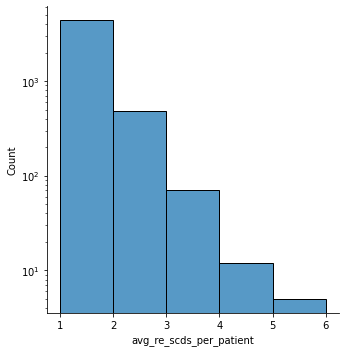

In [44]:
sns.displot(data=re_scds,x='avg_re_scds_per_patient',bins=5)
plt.yscale('log');

In [45]:
#Merging med dataset with a new feature "avg_re_scds_per_patient"
med=pd.merge(med,re_scds,how='left',left_on='patientid',right_on='patientid')
# filling empty entires in the new feature with 0, indicating its
med.avg_re_scds_per_patient.fillna(0,inplace=True)
med.isna().sum()

patientid                  0
gender                     0
scheduledday               0
appointmentday             0
age                        0
neighbourhood              0
scholarship                0
hipertension               0
diabetes                   0
alcoholism                 0
handcap                    0
sms_received               0
no_show                    0
ap_year                    0
ap_month                   0
ap_dom                     0
ap_dow                     0
ap_doy                     0
ap_hr                      0
sc_year                    0
sc_month                   0
sc_dom                     0
sc_dow                     0
sc_doy                     0
sc_hr                      0
waiting_days               0
age_group                  0
no_show_bin                0
avg_re_scds_per_patient    0
dtype: int64

### How does age distribution look like?

In [46]:
med.age.value_counts()

0      2334
1      1523
52     1057
2      1031
53     1019
       ... 
95       14
96        9
97        7
98        1
102       1
Name: age, Length: 100, dtype: int64

In [47]:
med.age.describe()

count    67750.000000
mean        36.525373
std         23.072912
min          0.000000
25%         17.000000
50%         36.000000
75%         55.000000
max        102.000000
Name: age, dtype: float64

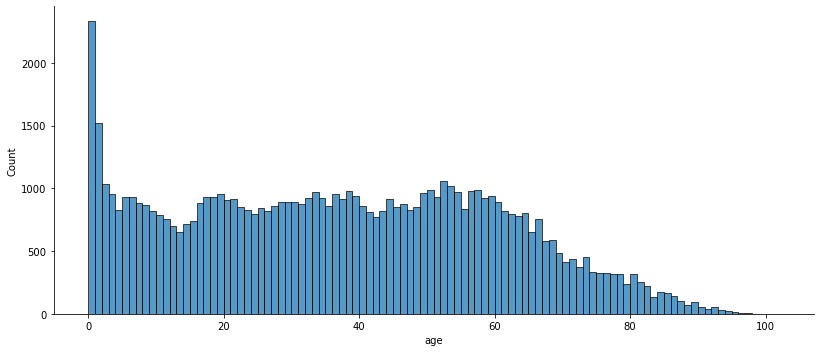

In [48]:
bins = np.arange(0, med['age'].max()+1, 1)
# plt.hist(data=med, x='age', bins=bins,edgecolor='black');
sns.displot(data=med, x='age', bins=bins,height=5,aspect=2.3);

Age distribution is multimodel, peaks are around 0, 20, 40 and 55

In [49]:
base_color = sns.color_palette()[0]
alt=sns.color_palette()[7]

### How does age group distripution look like?

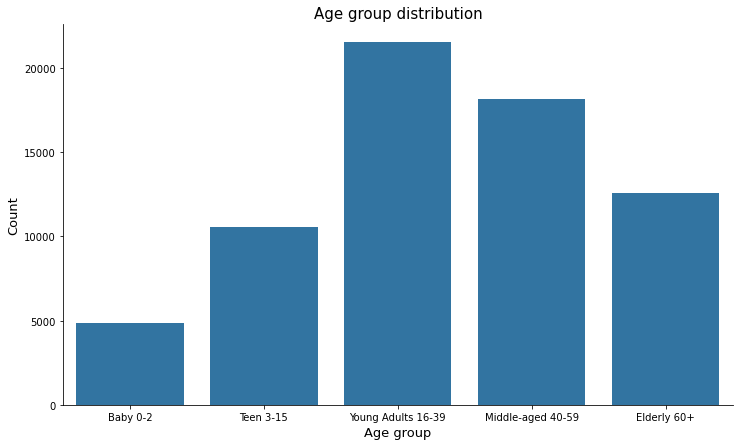

In [50]:
plt.figure(figsize=(12,7))
sns.countplot(data=med,x='age_group',color=base_color);
plt.xlabel('Age group',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.title('Age group distribution',fontsize=15);
sns.despine()

### What is gender distripution?

In [51]:
def bar_data(d,var):
    counts=d[var].value_counts().sort_index()
    idx=d[var].value_counts().sort_index().index
    pct=d[var].value_counts(normalize=True).sort_index()
    txt = ['{:0.1f}%'.format(v) for v in pct*100]
    return counts,idx,txt 

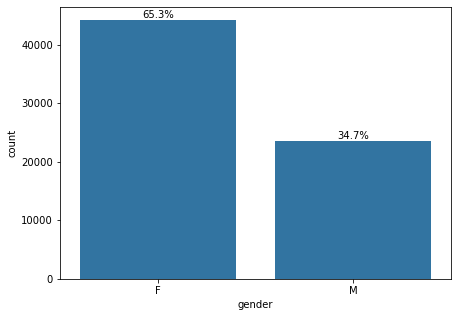

In [52]:
counts,idx,txt = bar_data(med,'gender')
fig=plt.figure(figsize=(7,5))
g=sns.countplot(data=med ,x='gender' ,color=base_color)

for i in range (len(counts)):
    plt.text(i,                             # x axis co-ordinate
             counts[i],                     # y axis co-ordinate
             txt[i],                        # text names to be displayed
             ha='center',                   # horizontal aligment
             va='bottom')

### What is the distripution of scheduled day and appointment day?

In [53]:
med.appointmentday.describe()

count          67750
unique            20
top       2016-05-16
freq            3844
Name: appointmentday, dtype: object

### What does the distribution for neighbourhoods look like?

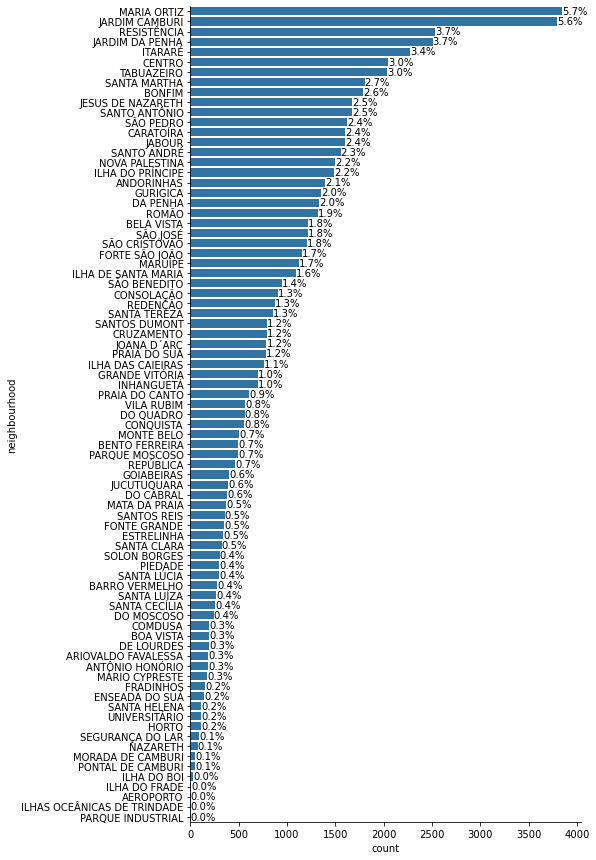

In [55]:
nbd_counts=med.neighbourhood.value_counts()
nbd_idx=med.neighbourhood.value_counts().index
nbd_pct=med.neighbourhood.value_counts(normalize=True)
nbd_txt = ['{:0.1f}%'.format(v) for v in nbd_pct*100] 
plt.figure(figsize = [7, 15]) 
sns.countplot(data=med,y='neighbourhood',color=base_color,order=nbd_idx)
plt.xlabel('count')
sns.despine()
for i in range (nbd_counts.shape[0]):
    plt.text(nbd_counts.values[i],  # x axis co-ordinate
             i,                      # y axis co-ordinate
             nbd_txt[i],       # text names to be displayed
             ha='left',              # horizontal aligment
             va='center')

### How many appointments had someone with scholarship program?

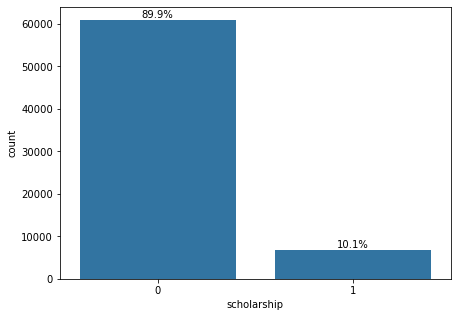

In [56]:
counts,idx,txt = bar_data(med,'scholarship')
fig=plt.figure(figsize=(7,5))
g=sns.countplot(data=med ,x='scholarship' ,color=base_color)

for i in range (len(counts)):
    plt.text(i,                             # x axis co-ordinate
             counts[i],# y axis co-ordinate
             txt[i],                 # text names to be displayed
             ha='center',                   # horizontal aligment
             va='bottom')

### How many appointments involved someone with hipertension disease?

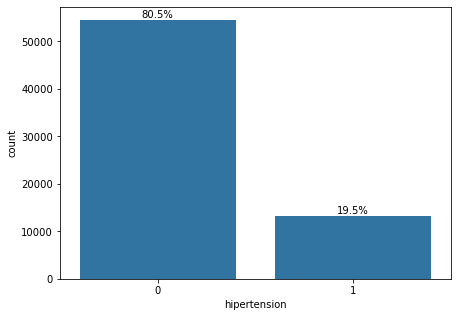

In [57]:
counts,idx,txt = bar_data(med,'hipertension')
fig=plt.figure(figsize=(7,5))
g=sns.countplot(data=med ,x='hipertension' ,color=base_color)

for i in range (len(counts)):
    plt.text(i,                             # x axis co-ordinate
             counts[i],# y axis co-ordinate
             txt[i],                 # text names to be displayed
             ha='center',                   # horizontal aligment
             va='bottom')

### How many appointments involved someone with diabetes disease?

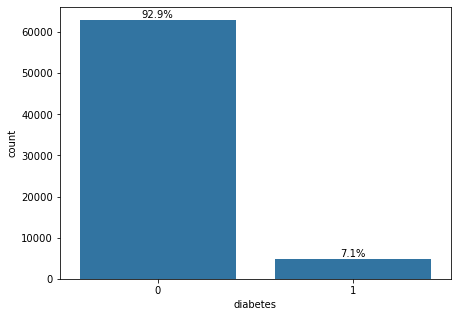

In [58]:
counts,idx,txt = bar_data(med,'diabetes')
fig=plt.figure(figsize=(7,5))
g=sns.countplot(data=med ,x='diabetes' ,color=base_color)

for i in range (len(counts)):
    plt.text(i,                             # x axis co-ordinate
             counts[i],# y axis co-ordinate
             txt[i],                 # text names to be displayed
             ha='center',                   # horizontal aligment
             va='bottom')

### How many appointments involved someone with alcoholism issues?

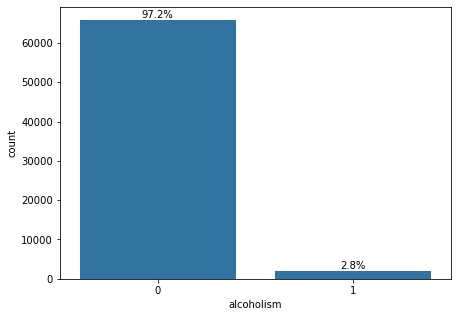

In [59]:
counts,idx,txt = bar_data(med,'alcoholism')
fig=plt.figure(figsize=(7,5))
g=sns.countplot(data=med ,x='alcoholism' ,color=base_color)

for i in range (len(counts)):
    plt.text(i,                             # x axis co-ordinate
             counts[i],# y axis co-ordinate
             txt[i],                 # text names to be displayed
             ha='center',                   # horizontal aligment
             va='bottom')

### How many appointments involved a handicaped patient?

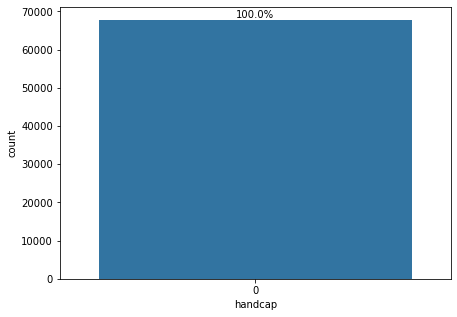

In [60]:
counts,idx,txt = bar_data(med,'handcap')
fig=plt.figure(figsize=(7,5))
g=sns.countplot(data=med ,x='handcap' ,color=base_color)

for i in range (len(counts)):
    plt.text(i,                             # x axis co-ordinate
             counts[i],# y axis co-ordinate
             txt[i],                 # text names to be displayed
             ha='center',                   # horizontal aligment
             va='bottom')

All the handicaped patients were removed in the outlier removal process.

### How many appointments patients were sent a SMS?

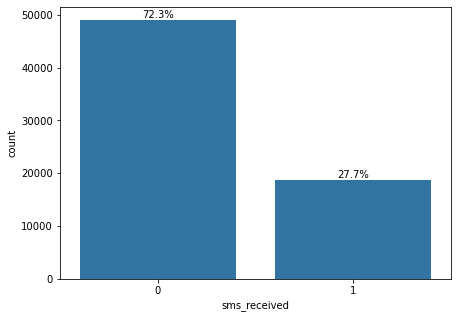

In [61]:
counts,idx,txt = bar_data(med,'sms_received')
fig=plt.figure(figsize=(7,5))
g=sns.countplot(data=med ,x='sms_received' ,color=base_color)

for i in range (len(counts)):
    plt.text(i,                             # x axis co-ordinate
             counts[i],# y axis co-ordinate
             txt[i],                 # text names to be displayed
             ha='center',                   # horizontal aligment
             va='bottom')

### How many appointments patients did not show up for?

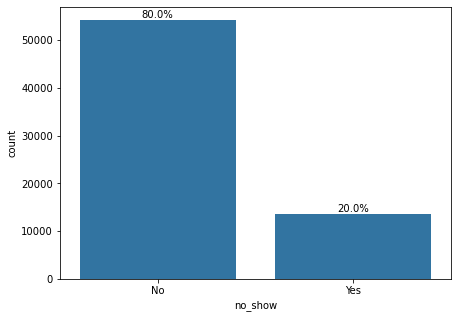

In [62]:
counts,idx,txt = bar_data(med,'no_show')
fig=plt.figure(figsize=(7,5))
g=sns.countplot(data=med ,x='no_show' ,color=base_color,order=med.no_show.value_counts().index)

for i in range (len(counts)):
    plt.text(i,                             # x axis co-ordinate
             counts[i],# y axis co-ordinate
             txt[i],                 # text names to be displayed
             ha='center',                   # horizontal aligment
             va='bottom')

### Do patients tend to reschedule their appointments?

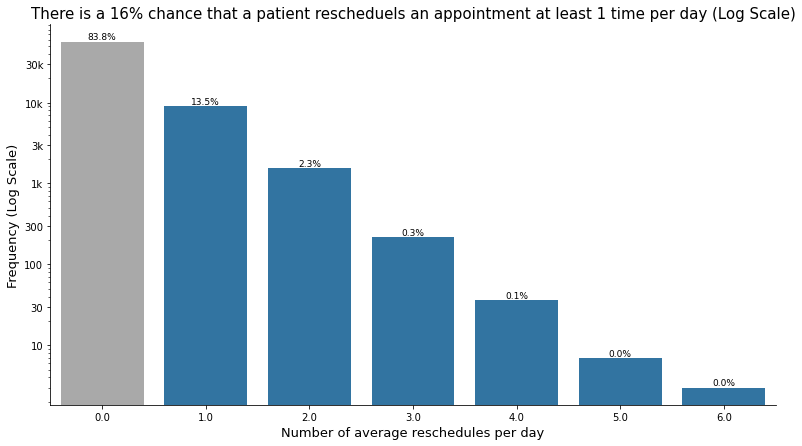

In [63]:
counts,idx,txt=bar_data(med,'avg_re_scds_per_patient')
plt.figure(figsize=(13,7))
colors = [base_color if (index in idx[1:]) else '#A9A9A9' for index in idx ]
g=sns.countplot(data=med ,x='avg_re_scds_per_patient' ,palette=colors)
[plt.text(i, counts[idx[i]],txt[i], ha='center',va='bottom',size=9) for i in range(len(counts))];
plt.yscale('log')
plt.yticks([10,30,100,300,1000,3000,10000,30000],['10','30','100','300','1k','3k','10k','30k'])
plt.xlabel("Number of average reschedules per day",fontsize=13)
plt.ylabel('Frequency (Log Scale)',fontsize=13);
plt.title("There is a 16% chance that a patient rescheduels an appointment at least 1 time per day (Log Scale)",fontsize=15)
sns.despine();

<a id='time'></a>
## Timestamp analysis

#### Year distribution

In [64]:
med.sc_year.value_counts()
# All occurences happened in 2016

2016    67750
Name: sc_year, dtype: int64

In [65]:
med.ap_year.value_counts()
# All occurences happened in 2016

2016    67750
Name: ap_year, dtype: int64

#### Day of Year Distribution

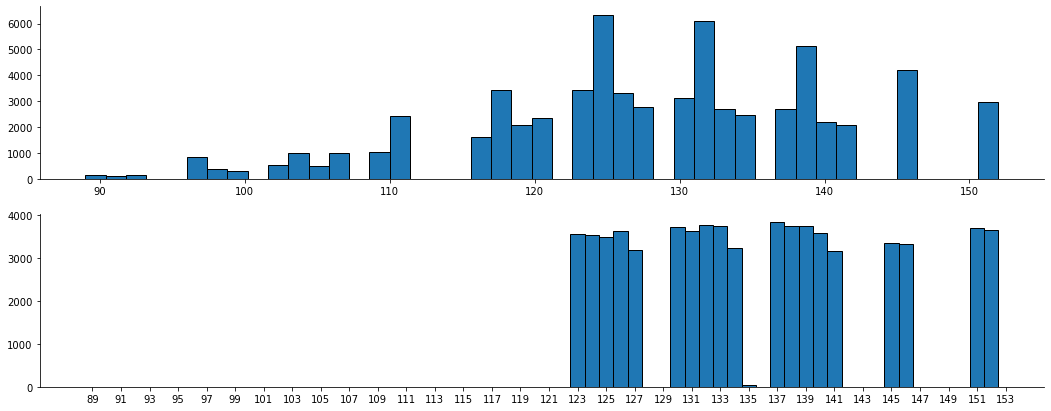

In [67]:
fig=plt.subplots(2,1,figsize=(18,7))
plt.subplot(2,1,1)
plt.hist(data=med,x='sc_doy',bins=45,edgecolor='black')
# plt.xticks(np.arange(0,43+1,1),[date.strftime('%d-%m') for date in idx],rotation=-45);
plt.subplot(2,1,2)
ax2=plt.hist(data=med, x='ap_doy',bins=np.arange(88.5, 152.5+1, 1),edgecolor='black')
plt.xticks(np.arange(89, 152+2, 2),np.arange(89, 152+2, 2));
sns.despine()

Although gaps should represent Days off on saturday and sunday, some gaps seem to be **bigger** than two days. To investigate this phenomenon,I'm using [Days of Year calender](https://asd.gsfc.nasa.gov/Craig.Markwardt/doy2016.html) and [official brazil holidays in 2016](https://www.timeanddate.com/holidays/brazil/2016#:~:text=20%20Mar,Government%20Holiday) to explain the reasoning behind these wide gaps.

- 93 Saturday
- 94 Sunday
- 95 Mon (4-april-2016) **unclear**
- 100 Saturday
- 101 Sunday
- 107 Saturday
- 108 Sunday
- 112 Thu (21-april-2016) [Tiradentes Day](https://www.calendarlabs.com/holidays/brazil/2016#:~:text=Apr%2021%2C%202016-,Tiradentes%20Day,-Sunday)
- 113 Fri (22-april-2016) **unclear** possibly to link with Saturday
- 114 Saturday
- 115 Sunday
- 121 Saturday
- 122 Sunday
- 135 Saturday
- 136 Sunday
- 142 Saturday
- 143 Sunday
- 144 Mon (23-May-2016) **unclear**
- 147 Thu (26-May-2016) [Corpus Christi](https://www.calendarlabs.com/holidays/brazil/2016#:~:text=May%2026%2C%202016-,Corpus%20Christi,-Wednesday)
- 148 Fri (27-May-2016) **unclear** possibly to link with Saturday
- 149 Saturday 
- 150 Sunday

Month distribution

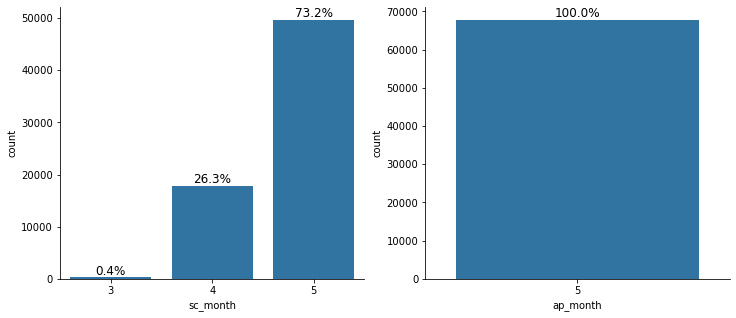

In [68]:
fig=plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
counts,idx,txt = bar_data(med,'sc_month')
sns.countplot(data=med ,x='sc_month',order=idx,color=base_color)
[plt.text(i, counts[idx[i]],txt[i], ha='center',va='bottom',size=12) for i in range (len(counts))];
plt.subplot(1,2,2)
counts,idx,txt = bar_data(med,'ap_month')
sns.countplot(data=med ,x='ap_month',order=idx,color=base_color);
[plt.text(i, counts[idx[i]],txt[i], ha='center',va='bottom',size=12) for i in range (len(counts))];
sns.despine()

Most of the schedueled appointments happened in may and less over the preceding months.

In [69]:
week_names=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

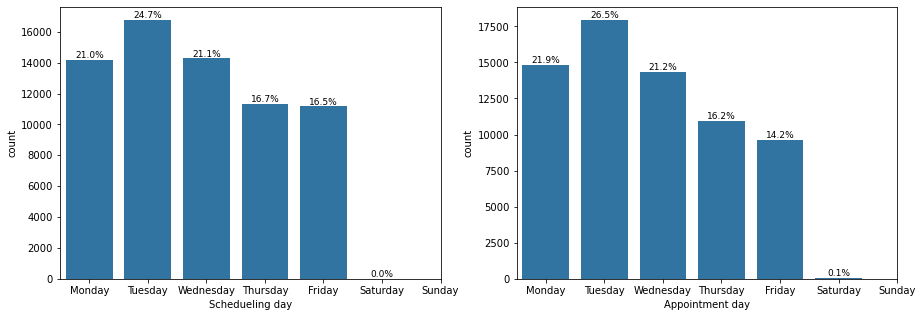

In [70]:
fig=plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
counts,idx,txt = bar_data(med,'sc_dow')
g = sns.countplot(data=med ,x='sc_dow',color=base_color)
[plt.text(i, counts[idx[i]],txt[i], ha='center',va='bottom',size=9) for i in range(len(counts))];
plt.xticks(np.arange(0,7,1),week_names);
plt.xlabel('Schedueling day');
plt.subplot(1,2,2)
counts,idx,txt = bar_data(med,'ap_dow')
g = sns.countplot(data=med ,x='ap_dow',color=base_color)
[plt.text(i, counts[idx[i]],txt[i], ha='center',va='bottom',size=9) for i in range(len(counts))];
plt.xticks(np.arange(0,7,1),week_names);
plt.xlabel('Appointment day');

looks like no schedueling rendezvous occur on saturday and sunday... Day off maybe? There is also Higher engagement on Tuesday followed by less engagment in the other days

Appointments that are schedueled to happen peaks also at Tuesday, following the same trend like graph on the left

### What are the congested  hours for scheduling appointments?

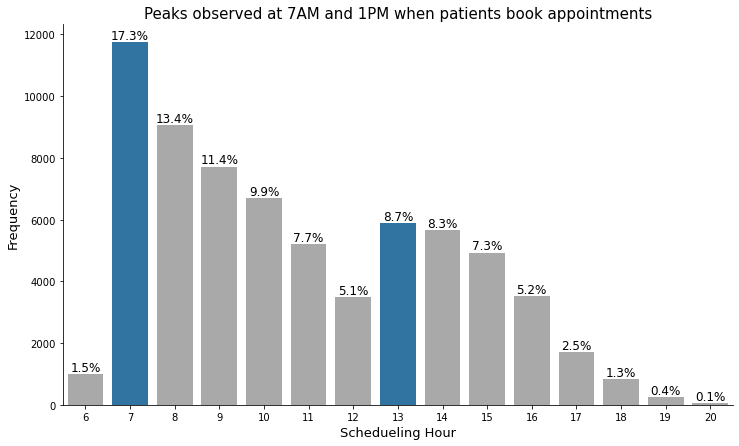

In [71]:
counts,idx,txt = bar_data(med,'sc_hr')
fig = plt.figure(figsize=(12,7))
colors = [base_color if (hour in [7,13]) else '#A9A9A9' for hour,value in counts.items() ]
g = sns.countplot(data=med ,x='sc_hr',palette=colors)
[plt.text(i, counts[idx[i]],txt[i], ha='center',va='bottom',size=12) for i in range(len(counts))];
# plt.xticks(np.arange(0,7,1),week_names);
plt.xlabel('Schedueling Hour',size=13);
plt.ylabel('Frequency',size=13);
plt.title("Peaks observed at 7AM and 1PM when patients book appointments",size=15);
sns.despine()

Scheduling rendezvous peaks at 7AM and gradually decreases till 12PM ,Peaks again at 1PM & 2PM and gradually decreases again till 10PM

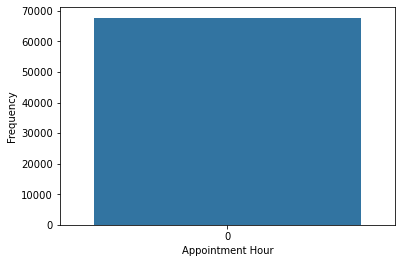

In [72]:
counts,idx,txt = bar_data(med,'ap_hr')
# colors = [base_color if (hour in [7,13]) else alt for hour,value in counts.items() ]
g = sns.countplot(data=med ,x='ap_hr')
# [plt.text(i, counts[idx[i]],txt[i], ha='center',va='bottom',size=9) for i in range(len(counts))];
# plt.xticks(np.arange(0,7,1),week_names);
plt.xlabel('Appointment Hour');
plt.ylabel('Frequency');

Looks like when Appointments get scheduled they don't get assigned a specific hour.

In [73]:
med.columns

Index(['patientid', 'gender', 'scheduledday', 'appointmentday', 'age',
       'neighbourhood', 'scholarship', 'hipertension', 'diabetes',
       'alcoholism', 'handcap', 'sms_received', 'no_show', 'ap_year',
       'ap_month', 'ap_dom', 'ap_dow', 'ap_doy', 'ap_hr', 'sc_year',
       'sc_month', 'sc_dom', 'sc_dow', 'sc_doy', 'sc_hr', 'waiting_days',
       'age_group', 'no_show_bin', 'avg_re_scds_per_patient'],
      dtype='object')

### Are there any particular waiting days associated with more pre-schedueled appointments?

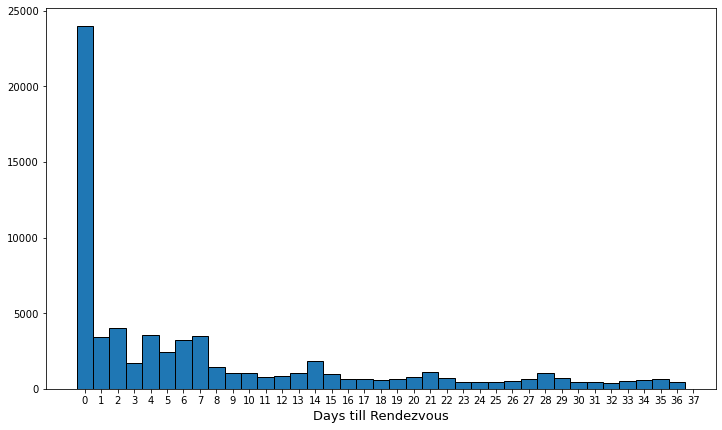

In [206]:
fig=plt.figure(figsize=(12,7))
bins = np.arange(0, med['waiting_days'].max()+1, 1)
freq, bins, patches =plt.hist(data=med, x='waiting_days', bins=bins,edgecolor='black');
plt.xticks(np.arange(0.5,med['waiting_days'].max()+1.5,1),np.arange(0,med['waiting_days'].max()+1,1));
plt.xlabel('Days till Rendezvous',size=13);

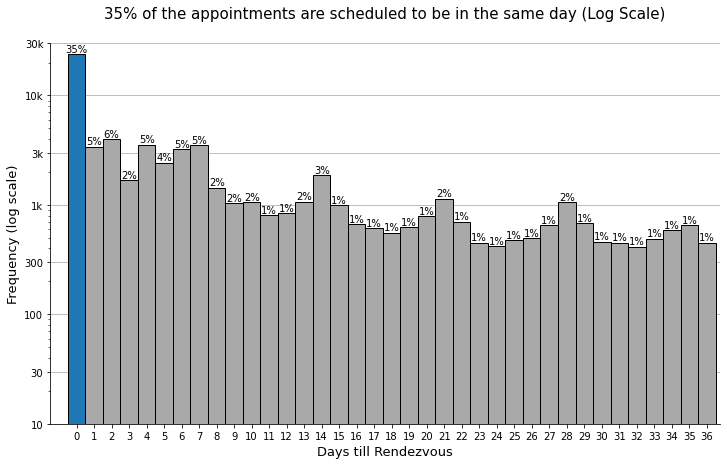

In [205]:
fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot(1,1,1)
ax.grid(zorder=0)
ax.xaxis.grid(color='#A9A9A9', linestyle='-')
bins = np.arange(0, med['waiting_days'].max()+1, 1)

freq, bins, patches =plt.hist(data=med, x='waiting_days', bins=bins,edgecolor='black',zorder=3);
bin_centers = np.diff(bins)*0.5 + bins[:-1]
plt.yscale('log')
patches[20].set_fc('#A9A9A9')
for n,(fr, x, patch) in enumerate(zip(freq, bin_centers, patches)):
  patches[n].set_fc('#A9A9A9')
  height = int(freq[n])
  plt.annotate("{:.0%}".format(height/len(med)),xy = (x, height),xytext = (0,0.2),textcoords = "offset points",
               ha = 'center', va = 'bottom')
patches[0].set_fc(base_color)
plt.xticks(np.arange(0.5,med['waiting_days'].max()+1.5,1),np.arange(0,med['waiting_days'].max()+1,1));
plt.ylabel('Frequency (log scale)');
plt.yticks([10,30,100,300,1000,3000,10000,30000],['10','30','100','300','1k','3k','10k','30k']);
plt.ylabel('Frequency (log scale)',size=13);
plt.xlabel('Days till Rendezvous',size=13);
plt.title('35% of the appointments are scheduled to be in the same day (Log Scale)',y=1.05,size=15);
plt.xlim(-1,37.25)
sns.despine()

In [77]:
# the % of the appointments scheduled to happen in the same day
med.groupby('waiting_days')['no_show'].value_counts(normalize=True)[0]*100

no_show
No     95.790396
Yes     4.209604
Name: no_show, dtype: float64

35% of all the appointments are scheduled to happen in the same day, but around 4% of those appointments, their patients don't show up.

There is also an interesting multimodal pattern!

In [78]:
wd_counts = med.waiting_days.value_counts().sort_index()
highlights =  med.waiting_days.value_counts()[[7,14,21,28,35]]
week_txt= [f"{int(ind/7)} weeks" for ind in highlights.index ]
week_txt[0]='1 week'
week= pd.Series(week_txt,index=[7,14,21,28,35])

### What do the peaks represent in the waiting days distribution?

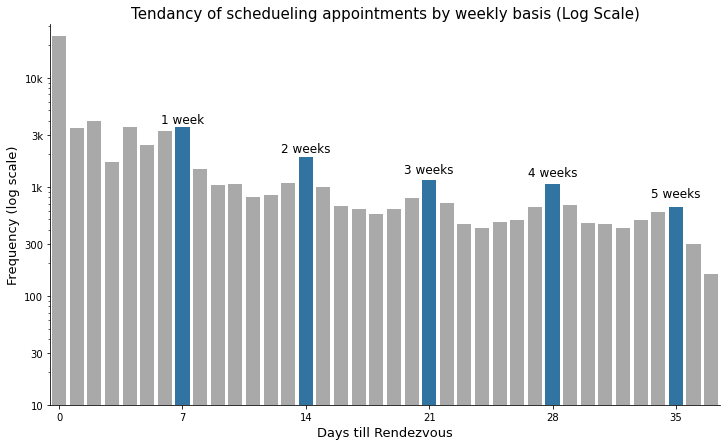

In [79]:
colors = [base_color if (index in highlights.index) else '#A9A9A9' for index,value in wd_counts.items() ]
counts,idx,txt = bar_data(med,'waiting_days')
fig = plt.figure(figsize=(12,7))
g = sns.countplot(data=med ,x='waiting_days' ,palette=colors)
[plt.text(index,value+100,week[index], ha='center',va='bottom',size=12) for index,value in highlights.items() ]  
                           
plt.yscale('log')
plt.yticks([10,30,100,300,1000,3000,10000],['10','30','100','300','1k','3k','10k']);
plt.xticks(np.arange(idx.min(),idx.max()+7,7),np.arange(idx.min(),idx.max()+7,7));
plt.ylabel('Frequency (log scale)',size=13);
plt.xlabel('Days till Rendezvous',size=13);
plt.title('Tendancy of schedueling appointments by weekly basis (Log Scale)',size=15);
plt.xlim(-0.5,37.5)
sns.despine()

While `waiting days` 0, 2 & 4 have higher frequencies than other days, It looks like the peaks in the distribution corresponds exactly to weekly standard counts, 7 days is 1 week, 14 days is 2 weeks ........ and so on, so "patients" or "staff" tend to schedule appointments more by weekly basis, assuming they don't schedule during the 1st week.

<a id='bi'></a>
# Bivariate Exploration

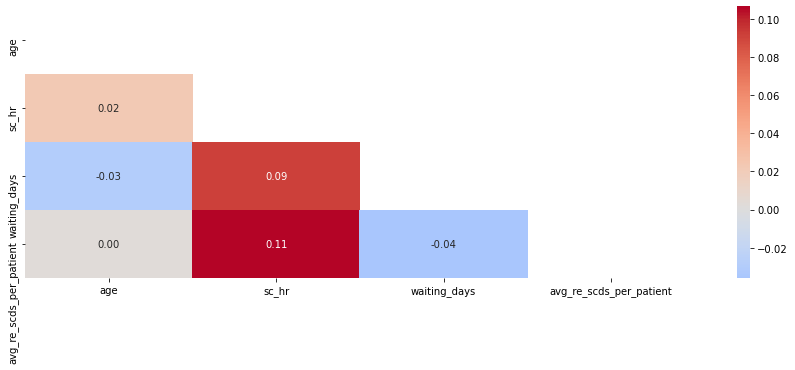

In [80]:
corr=med[['age','sc_hr','waiting_days','avg_re_scds_per_patient']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot = True, 
            fmt = '.2f', cmap = 'coolwarm',
            mask=mask, center = 0);

It doesn't look like there is any strong linear correlation between any of these numeric variables.

### Do specific schedule weekdays associate with certain appointment weekdays?

In [196]:
data=med.groupby(['sc_dow','ap_dow']).size().reset_index(name='count')
data_pivot=data.pivot(index='sc_dow',columns='ap_dow',values='count')
data_pivot

ap_dow,0,1,2,3,4,5
sc_dow,,,,,,
0,7261,2407,2425,1217,879,7
1,1872,8975,2256,2406,1250,6
2,1727,2183,6791,1647,1914,6
3,2223,1675,1399,4811,1218,9
4,1761,2703,1473,889,4340,1
5,5,2,1,1,2,8


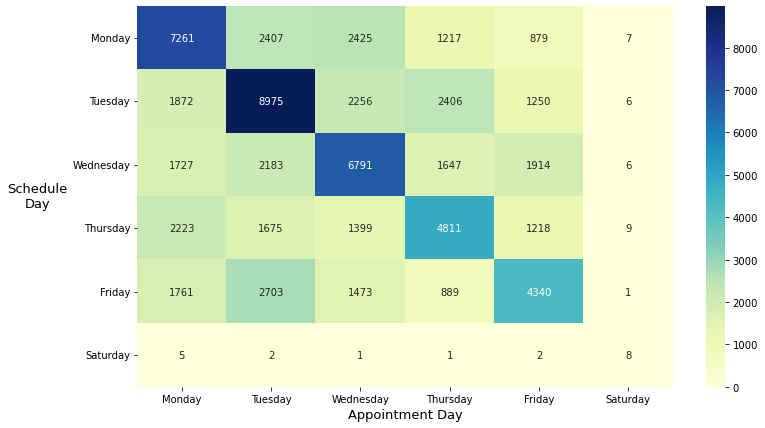

In [207]:
plt.figure(figsize=[12,7])
sns.heatmap(data_pivot,annot=True,fmt='d',cmap='YlGnBu',vmin=0)
plt.xticks(np.arange(0.5,5.5+1,1),week_names)
plt.yticks(np.arange(0.5,5.5+1,1),week_names,va='center',rotation=0)
plt.ylabel('Schedule\nDay',size=13,rotation=0,ha='center',va='center',labelpad=35);
plt.xlabel('Appointment Day',size=13);

Again, since the diagonal has the highest counts, the heat map depicts the tendancy to schedule appointments by weekly basis, as shown before in the univariate analysis for the waiting days.

In [603]:
med[['sc_dow','no_show_bin']].describe()

,sc_dow,no_show_bin
count,67750.000000,67750.000000
mean,1.831277,0.199720
std,1.373423,0.399792
min,0.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,3.000000,0.000000
max,5.000000,1.000000


### Does waiting more days relates to not attending appointments?

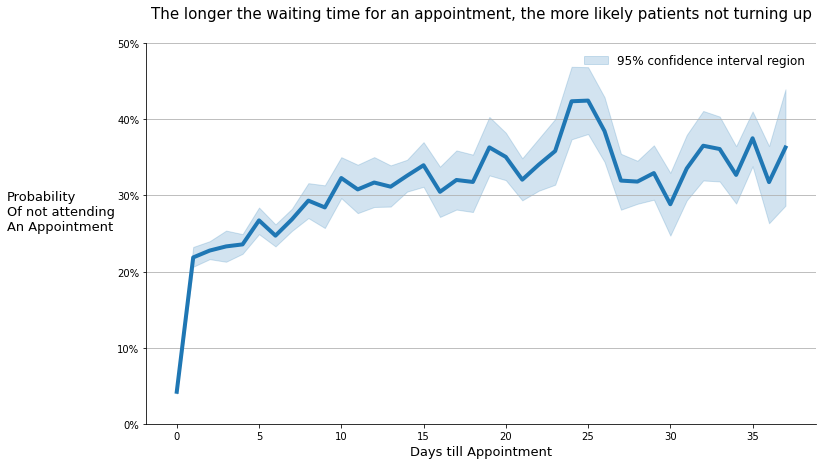

In [210]:
import warnings
warnings.filterwarnings('ignore')
fig =plt.figure(figsize=(12,7))  
ax = fig.add_subplot(1,1,1)
ax.grid(zorder=0)
ax.xaxis.grid(color='gray', linestyle='-')
sns.lineplot(data=med, x='waiting_days',y='no_show_bin',lw=4,ax=ax,zorder=3)
plt.ylabel('Probability\nOf not attending\nAn Appointment',size=13,rotation=0,ha='left',va='bottom',labelpad=110);
plt.xlabel('Days till Appointment',size=13)
plt.yticks(plt.yticks()[0],pd.DataFrame(["{:.0%}".format(yy) for yy in plt.yticks()[0]])[0].values)
plt.title('The longer the waiting time for an appointment, the more likely patients not turning up',size=15,y=1.05)
plt.legend(['_','95% confidence interval region'],frameon=False,prop={'size':12},loc='best');
sns.despine()

### Is age related to not showing up for appointments?

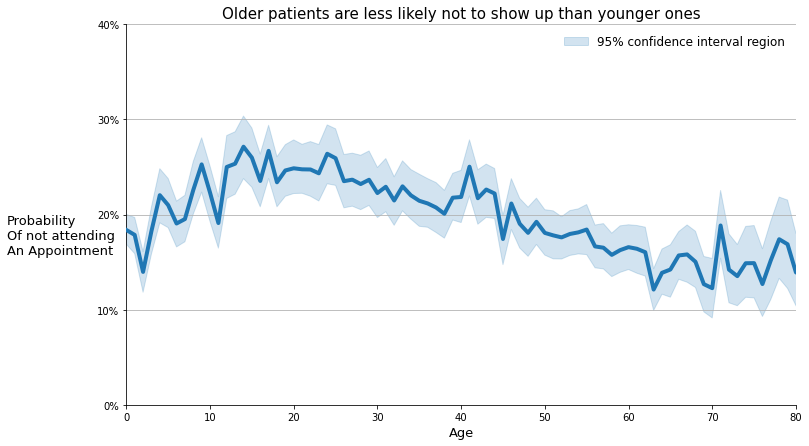

In [211]:
fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot(1,1,1)
ax.grid(zorder=0)
ax.xaxis.grid(color='gray', linestyle='-')
g=sns.lineplot(data=med, x='age',y='no_show_bin',lw=4,palette=[base_color],zorder=3)
plt.xlim(0, 80)
plt.title('Older patients are less likely not to show up than younger ones',size=15);
plt.ylabel('Probability\nOf not attending\nAn Appointment',size=13,rotation=0,va='top',ha='left',labelpad=90);
plt.yticks(plt.yticks()[0],pd.DataFrame(["{:.0%}".format(yy) for yy in plt.yticks()[0]])[0].values)
plt.xlabel('Age',size=13);
plt.ylim(0,0.4);
plt.legend(['_','95% confidence interval region'],frameon=False,prop={'size':12},loc='best');
sns.despine()

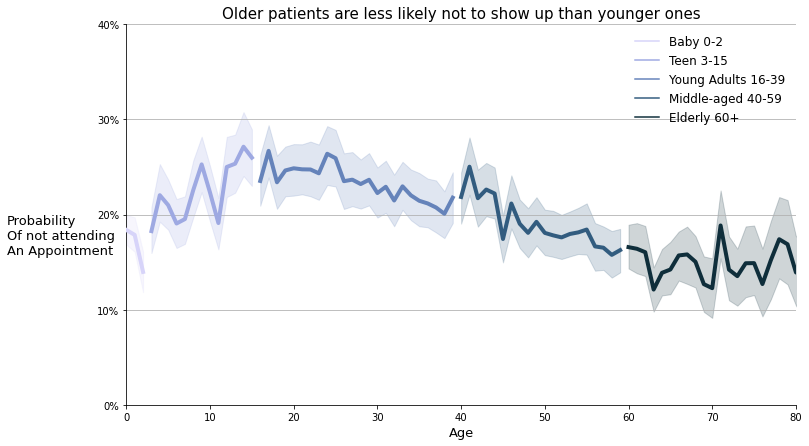

In [213]:
fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot(1,1,1)
ax.grid(zorder=0)
ax.xaxis.grid(color='gray', linestyle='-')
g=sns.lineplot(data=med, x='age',y='no_show_bin',lw=4,zorder=3,hue='age_group',
    hue_order=['Baby 0-2','Teen 3-15','Young Adults 16-39','Middle-aged 40-59', 'Elderly 60+'],
    palette=sns.cubehelix_palette(5,start=2.5,rot=0.2,hue=1))
plt.xlim(0, 80)
plt.title('Older patients are less likely not to show up than younger ones',size=15);
plt.ylabel('Probability\nOf not attending\nAn Appointment',size=13,rotation=0,va='top',ha='left',labelpad=90);
plt.yticks(plt.yticks()[0],pd.DataFrame(["{:.0%}".format(yy) for yy in plt.yticks()[0]])[0].values)
plt.xlabel('Age',size=13);
plt.ylim(0,0.4);
plt.legend(title=False,frameon=False,prop={'size':12})
sns.despine()

### Does the time of scheduling an appointment during the day , influence the likelihood of not turning up?

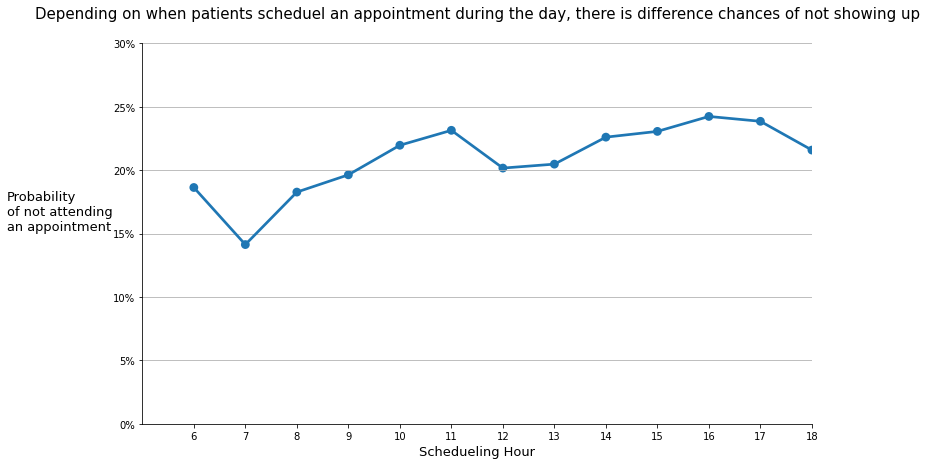

In [607]:
fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot(1,1,1)
ax.grid(zorder=0)
ax.xaxis.grid(color='#', linestyle='-')
sns.pointplot(data=med,x='sc_hr',y='no_show_bin',ci=False,ax=ax,zorder=3)
plt.xlabel('Schedueling Hour',size=13);
plt.ylabel('Probability\nof not attending\nan appointment',size=13,rotation=0,ha='left',labelpad=106);
plt.title("Depending on when patients scheduel an appointment during the day, there is difference chances of not showing up",size=15,y=1.05);
plt.ylim(0,0.3)
plt.yticks(plt.yticks()[0],pd.DataFrame(["{:.0%}".format(yy) for yy in plt.yticks()[0]])[0].values)
plt.xlim(-1,12)
sns.despine()

While the change in the likelihood of not showing up for an appointment **isn't significant**, we can spot a positive correlation between 7AM and 11AM , and between 1PM and 4PM

### Do patients that reschedule their appointments during the day are more likely not to show up?

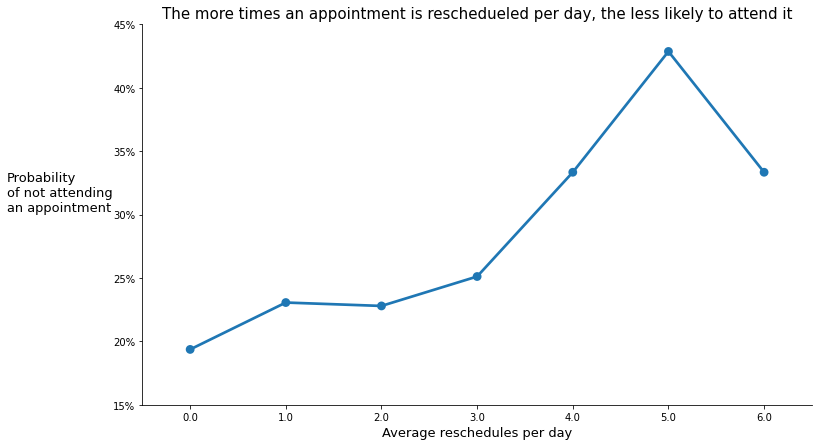

In [608]:
fig=plt.figure(figsize=(12,7))
sns.pointplot(data=med,x='avg_re_scds_per_patient',y='no_show_bin',ci=False)
plt.xlabel("Average reschedules per day",fontsize=13)
plt.ylabel('Probability\nof not attending\nan appointment',size=13,rotation=0,ha='left',labelpad=106);
plt.title("The more times an appointment is reschedueled per day, the less likely to attend it",size=15);
plt.yticks(plt.yticks()[0],pd.DataFrame(["{:.0%}".format(yy) for yy in plt.yticks()[0]])[0].values)
sns.despine()

### Are there certain hourly scheduling times associated with a specific age group?

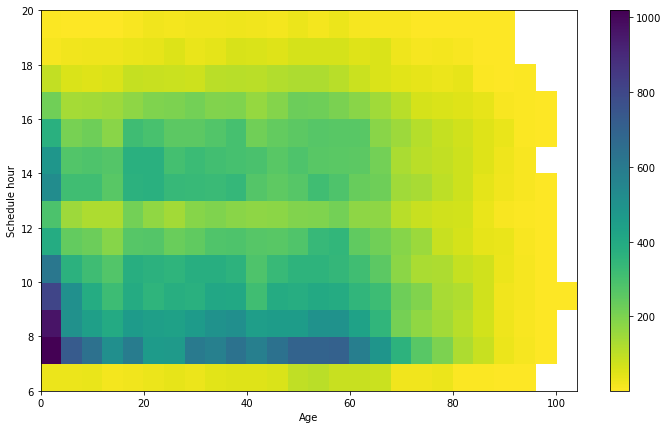

In [609]:
fig = plt.figure(figsize=(12,7))

bins_x = np.arange(0, 102+4, 4)
bins_y = np.arange(6, 20+1, 1)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = med, x = 'age', y = 'sc_hr', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
#plt.xticks(np.arange(89, 152+3, 3),np.arange(89, 152+3, 3))
#plt.yticks(np.arange(123, 152+3, 3),np.arange(123, 152+3, 3))
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('Schedule hour');

In [610]:
def minu(t):
    t=str(t).split('.')
    if t[1]== '5':
        t[1]='30'
    else:
        t[1]='00'
    if int(t[0]) < 12:
        out= t[0]+':'+t[1]+" AM"
    else:
        out= t[0]+':'+t[1]+" PM"
    return out

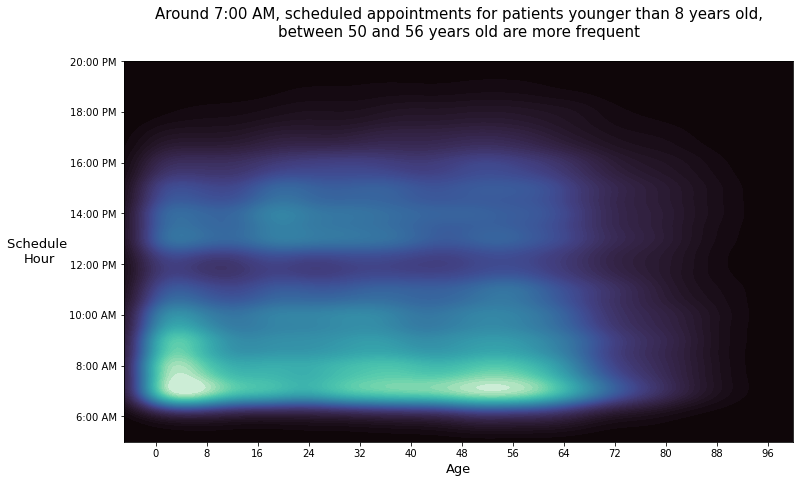

In [611]:
fig=plt.figure(figsize=(12,7))
sns.kdeplot(data=med, y="sc_hr", x="age", fill=True, thresh=0, levels=100, cmap="mako");
plt.xlabel('Age',size=13);
plt.xticks(np.arange(0,102+8,8),np.arange(0,102+8,8))
plt.title('Around 7:00 AM, scheduled appointments for patients younger than 8 years old,\nbetween 50 and 56 years old are more frequent',y=1.05,size=15)
plt.ylabel('Schedule \nHour',size=13,rotation=0,va='center',labelpad=30);
plt.yticks(plt.yticks()[0],pd.DataFrame([minu(yy) for yy in plt.yticks()[0]])[0].values);
plt.ylim(5,20)
plt.xlim(-5,100);

Concentrations observed around 7AM schedule time for appointments. they are associated with patients of age less than 8 years old and between 50 and 56 years old

### Do the patients who didn't reveive SMS messages are more likely not to show up?

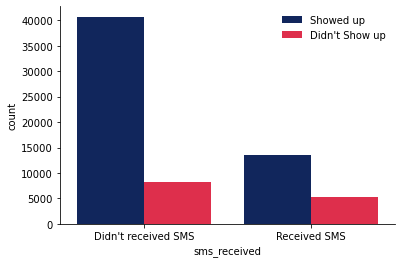

In [612]:
sns.countplot(data=med,x='sms_received',palette=['#042069','#fb1239'],hue='no_show_bin',dodge=True)
plt.xticks([0,1],["Didn't received SMS",'Received SMS']);
plt.legend(labels=['Showed up',"Didn't Show up"],title=False,frameon=False)
sns.despine()

In [613]:
sms_counts=med.groupby('sms_received')['no_show_bin'].value_counts()
no_sms_r=sms_counts[0][1]/sms_counts[0].sum()
sms_r=sms_counts[1][1]/sms_counts[1].sum()
print('no sms no show rate:',f'{no_sms_r:.1%}')
print('sms no show rate:',f'{sms_r:.1%}')
f'{(sms_r - no_sms_r):.1%}'

no sms no show rate: 16.9%
sms no show rate: 27.9%


'10.9%'

It's hard to tell, because the quantity of patients who recieved SMS compared to ones who didn't isn't balanced, and the results are **counterintuitive**, in an ideal case we would need the same amount people to receive SMS , and then perfom A/B test to see if the difference is statistically significant to indicate whether `no_shows` are associated with more or less patients who recieved SMS.

$$ H_0 : P_{sms} \leq P_{nosms} $$
$$ H_1 : P_{sms} > P_{nosms} $$
Rephrased into:
$$ H_0 : P_{sms} - P_{nosms} \leq 0 $$
$$ H_1 : P_{sms} - P_{nosms} > 0 $$

Where $P$ is the probabilty of not showing up

<a id='conclusions'></a>
# Conclusion
- Around 16% of the patients reschedule their appointment atleast 1 time per day.
- Several workdays (4-April_2016, 23-May-2016) had an unexplained inactivity.
- Tuesday is the busiest day for appointments while Thursday and Friday are the quietest, disregarding days off.
- Tuesday is the busiest day for scheduling appointments while Friday is the quietest, disregarding days off.
- Peak times where scheduling takes place are 7 AM and 1 PM.
- 35% of all the appointments are scheduled to happen in the same day, but around 4% of those appointments, their patients don't show up.
- There is a tendancy for scheduling appointments by weekly basis since they are represented as peaks in the `waiting_days` distribution.
- The likelehood of not showing up for an appointment increases, the longer the patient wait for his/her particular appointment.
- Older patients are more likely to show up for an appointment than younger ones.
- The more times a patient rescheduel his/her appointment the less likely he/she show up.
- Concentrations observed around 7AM schedule time for appointments. they are associated with patients of age less than 8 years old and between 50 and 56 years old.

<a id='limitations'></a>
# Limitations

- One thing that i found to be strange , the fact that majority of data samples comes from scheduel day after march 2016, with earliest record at november 2015, this is a 5 months difference and thats huge , during this period there are 402 appointments only, why there wasn't more appointments during this period, i find it also weird that after march 2016 it shows significant growth for appointments. was the selection process for the sample biased?, if so this could mean that calculations above are insignificant and could be wrong.
- Most of the data attributes like `diabetes`, `no_show` , `sms_received`, `hipertension` and `scholarship` are imbalanced, and it is difficult to do classification based on them.
- One of these imbalance issues is demonstrated regarding `sms_received` and `no_show` attributes, and at some point it shows that the `no_show` rate for the group who recieved SMS is high than that of the group who didn't receive an SMS, which is counterintuitive.
- There is a large portion of the data numerically considered as outliers, and after removing the reschedules to analyse the actual appointments, we're down from 110,527 to 67,750 entries, which make certain categories in some attributes of the data set more or less at a critical state to run analysis on.